In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from address_config import find_address
# data preparation
# comment my filepath and replace by yours.
file_path = find_address()
with open(file_path[0], 'r') as file:
    creator_data = json.load(file)
with open(file_path[1], 'r') as file:
    content_data = json.load(file)

In [2]:
#Ning's EDA plots and ranking

#compute the average and standard deviation of interaction data for scaling
def compute_intersection_average(data, inter_name):
    inter_coll=[]
    for i in data:
        inter = i.get(inter_name, "")
        if inter == "":
            print(i.get("note_id", "")+ " has no "+inter_name)
        else:
            inter_coll.append(int(inter))
    return np.mean(inter_coll),np.std(inter_coll)
mean_like, std_like = compute_intersection_average(content_data, "liked_count")
mean_coll, std_coll = compute_intersection_average(content_data, "collected_count")
mean_comment, std_comment = compute_intersection_average(content_data, "comment_count")
mean_share, std_share = compute_intersection_average(content_data, "share_count")
mean_fans, std_fans = compute_intersection_average(creator_data,"fans")
mean_time, std_time = compute_intersection_average(content_data, "time")

weight_like = 1
weight_coll = 2
weight_comm = 3
weight_share = 4
weight_time = 1



In [19]:
creator_collection=[]
for i in range(len(creator_data)):
    num_note = 0
    num_like = 0
    num_coll = 0
    num_comm = 0
    num_share = 0
    score_coll = []
    user_id = creator_data[i].get("user_id", "")
    gender = creator_data[i].get("gender") or "不明"
    for j in range(len(content_data)):
        if content_data[j]["user_id"] == user_id:    
            score = 0 
            score += weight_like*(int(content_data[j]["liked_count"])-mean_like)/std_like 
            score += weight_coll*(int(content_data[j]["collected_count"])-mean_coll)/std_coll 
            score += weight_comm*(int(content_data[j]["comment_count"])-mean_comment)/std_comment 
            score += weight_share*(int(content_data[j]["share_count"])-mean_share)/std_share 
            score += weight_time*(int(content_data[j]["time"])-mean_time)/std_time
            score_coll.append(score)
            
            num_like += int(content_data[j]["liked_count"])
            num_coll += int(content_data[j]["collected_count"])
            num_comm += int(content_data[j]["comment_count"])
            num_share += int(content_data[j]["share_count"])

            num_note += 1
    creator_collection.append([user_id,gender,int(creator_data[i].get("fans", 0)),num_like,num_coll,num_comm,num_share,num_note,np.mean(score_coll)])
df = pd.DataFrame(creator_collection, columns=["id", "gender", "fan","like","coll","comment","share","num_note","score"])


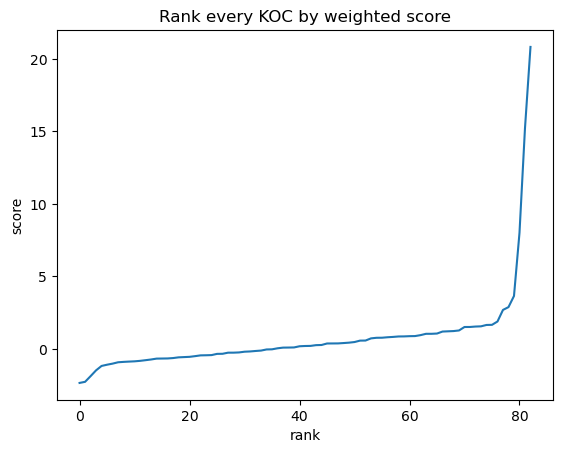

In [4]:
plt.plot(sorted(df["score"]))
plt.title("Rank every KOC by weighted score")
plt.ylabel("score")
plt.xlabel("rank")
plt.show()

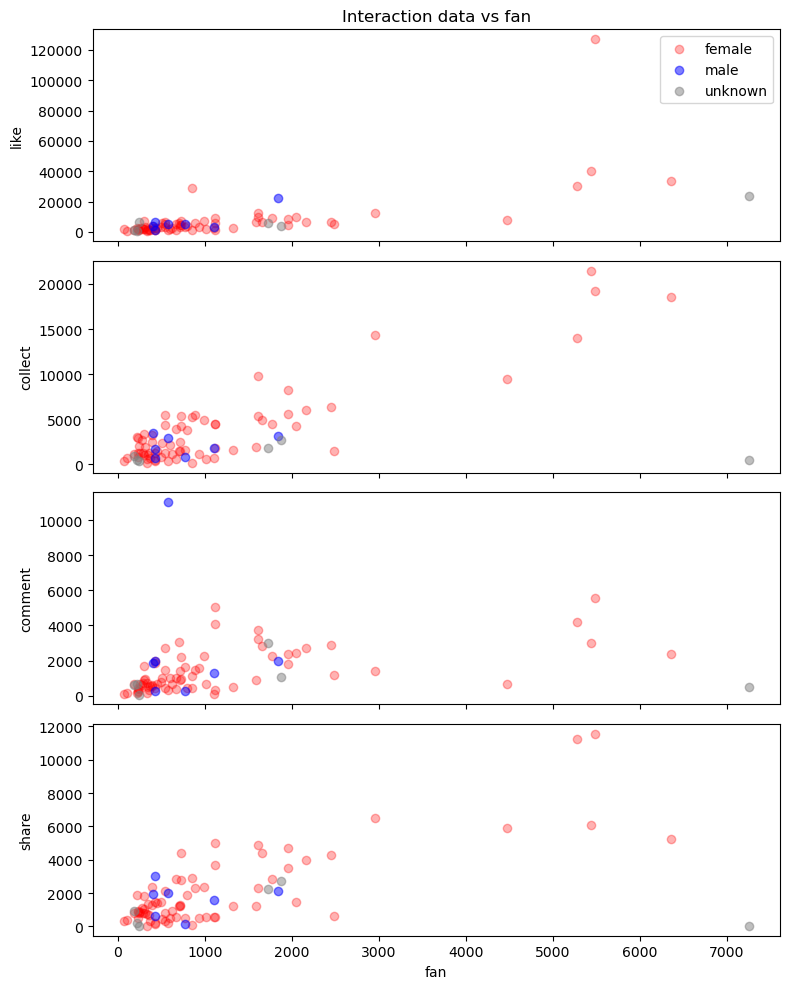

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)

# Plot data on each subplot
axes[0].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'like'], alpha=0.3, color='r',label="female")
axes[0].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'like'], alpha=0.5, color='b',label="male")
axes[0].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'like'], alpha=0.5, color='gray',label="unknown")
axes[0].set_title('Interaction data vs fan')
axes[0].set_ylabel('like')
axes[0].legend()
axes[1].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'coll'], alpha=0.3, color='r',label="female")
axes[1].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'coll'], alpha=0.5, color='b',label="male")
axes[1].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'coll'], alpha=0.5, color='gray',label="unknown")
axes[1].set_ylabel('collect')

axes[2].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'comment'], alpha=0.3, color='r',label="female")
axes[2].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'comment'], alpha=0.5, color='b',label="male")
axes[2].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'comment'], alpha=0.5, color='gray',label="unknown")
axes[2].set_ylabel('comment')

axes[3].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'share'], alpha=0.3, color='r',label="female")
axes[3].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'share'], alpha=0.5, color='b',label="male")
axes[3].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'share'], alpha=0.5, color='gray',label="unknown")
axes[3].set_ylabel('share')
axes[3].set_xlabel('fan')  # Only bottom subplot shows x-label
plt.tight_layout()
plt.show()

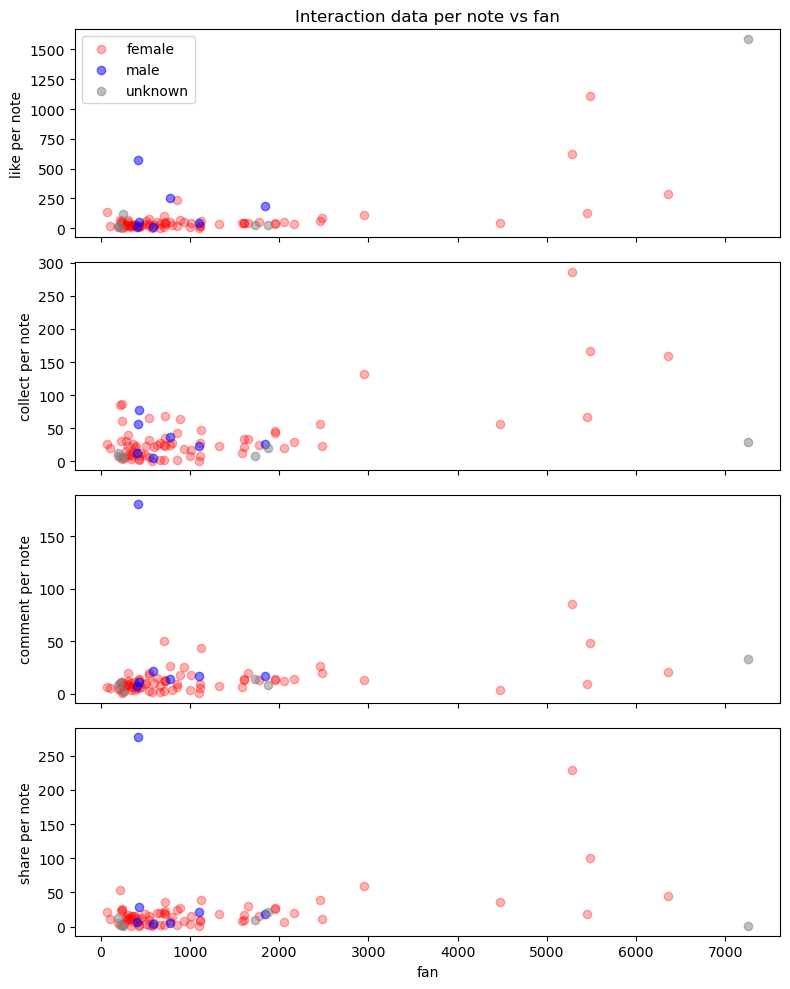

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)

# Plot data on each subplot
axes[0].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'like']/df.loc[df['gender'] == '女', 'num_note'], alpha=0.3, color='r',label="female")
axes[0].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'like']/df.loc[df['gender'] == '男', 'num_note'], alpha=0.5, color='b',label="male")
axes[0].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'like']/df.loc[df['gender'] == '不明', 'num_note'], alpha=0.5, color='gray',label="unknown")
axes[0].set_title('Interaction data per note vs fan')
axes[0].set_ylabel('like per note')
axes[0].legend()
axes[1].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'coll']/df.loc[df['gender'] == '女', 'num_note'], alpha=0.3, color='r',label="female")
axes[1].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'coll']/df.loc[df['gender'] == '男', 'num_note'], alpha=0.5, color='b',label="male")
axes[1].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'coll']/df.loc[df['gender'] == '不明', 'num_note'], alpha=0.5, color='gray',label="unknown")
axes[1].set_ylabel('collect per note')

axes[2].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'comment']/df.loc[df['gender'] == '女', 'num_note'], alpha=0.3, color='r',label="female")
axes[2].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'comment']/df.loc[df['gender'] == '男', 'num_note'], alpha=0.5, color='b',label="male")
axes[2].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'comment']/df.loc[df['gender'] == '不明', 'num_note'], alpha=0.5, color='gray',label="unknown")
axes[2].set_ylabel('comment per note')

axes[3].scatter(df.loc[df['gender'] == '女', 'fan'], df.loc[df['gender'] == '女', 'share']/df.loc[df['gender'] == '女', 'num_note'], alpha=0.3, color='r',label="female")
axes[3].scatter(df.loc[df['gender'] == '男', 'fan'], df.loc[df['gender'] == '男', 'share']/df.loc[df['gender'] == '男', 'num_note'], alpha=0.5, color='b',label="male")
axes[3].scatter(df.loc[df['gender'] == '不明', 'fan'], df.loc[df['gender'] == '不明', 'share']/df.loc[df['gender'] == '不明', 'num_note'], alpha=0.5, color='gray',label="unknown")
axes[3].set_ylabel('share per note')
axes[3].set_xlabel('fan')  # Only bottom subplot shows x-label
plt.tight_layout()
plt.show()